# **Курсовой проект "Python для Data Science"**

### **Задание:**
Ваша задача этом соревновании - предсказать цены на квартиры в датасете test.csv. Вам будут даны два датасета: train.csv (содержит признаки и цены на квартиры) и test.csv (только признаки).

**Целевая переменная:**

Price

**Метрика для оценки:**

Коэффициент детерминации R2 - (sklearn.metrics.r2_score)

**Описание датасета:**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

**Подключение библиотек и скриптов**

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

ModuleNotFoundError: No module named 'numpy'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

In [4]:
# from google.colab import files
# uploaded = files.upload()

**Пути к директориям и файлам**

In [5]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'
RES_PATH = './result_submission.csv'

**Загрузка данных**

In [6]:
df = pd.read_csv(TRAIN_DATASET_PATH)

**Изучение датасета**

In [7]:
print(df.shape)

(10000, 20)


In [8]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.00000,47.98156,29.44275,6.00000,7,9.00000,1969,0.08904,B,B,33,7976,5,nan,0,11,B,184966.93073
1,15053,41,3.00000,65.68364,40.04954,8.00000,7,9.00000,1978,0.00007,B,B,46,10309,1,240.00000,1,16,B,300009.45006
2,4765,53,2.00000,44.94795,29.19761,0.00000,8,12.00000,1968,0.04964,B,B,34,7759,0,229.00000,1,3,B,220925.90852
3,5809,58,2.00000,53.35298,52.73151,9.00000,8,17.00000,1977,0.43789,B,B,23,5735,3,1084.00000,0,5,B,175616.22722
4,10783,99,1.00000,39.64919,23.77617,7.00000,11,12.00000,1976,0.01234,B,B,35,5776,1,2078.00000,2,4,B,150226.53164


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

**Изменнение типа Id и DistrictId**

In [10]:
df['Id'] = df['Id'].astype('str')
df['DistrictId'] = df['DistrictId'].astype('str')

In [11]:
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.00000,7887.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,5202.00000,10000.00000,10000.00000,10000.00000
mean,1.89050,56.31578,37.19964,6.27330,8.52670,12.60940,3990.16630,0.11886,24.68700,5352.15740,8.03920,1142.90446,1.31950,4.23130,214138.85740
std,0.83951,21.05873,86.24121,28.56092,5.24115,6.77597,200500.26143,0.11903,17.53261,4006.79980,23.83187,1021.51726,1.49360,4.80634,92872.29387
min,0.00000,1.13686,0.37062,0.00000,1.00000,0.00000,1910.00000,0.00000,0.00000,168.00000,0.00000,0.00000,0.00000,0.00000,59174.77803
25%,1.00000,41.77488,22.76983,1.00000,4.00000,9.00000,1974.00000,0.01765,6.00000,1564.00000,0.00000,350.00000,0.00000,1.00000,153872.63394
50%,2.00000,52.51331,32.78126,6.00000,7.00000,13.00000,1977.00000,0.07542,25.00000,5285.00000,2.00000,900.00000,1.00000,3.00000,192269.64488
75%,2.00000,65.90063,45.12880,9.00000,12.00000,17.00000,2001.00000,0.19578,36.00000,7227.00000,5.00000,1548.00000,2.00000,6.00000,249135.46217
max,19.00000,641.06519,7480.59213,2014.00000,42.00000,117.00000,20052011.00000,0.52187,74.00000,19083.00000,141.00000,4849.00000,6.00000,23.00000,633233.46657


In [12]:
df.Price.describe()

count    10000.00000
mean    214138.85740
std      92872.29387
min      59174.77803
25%     153872.63394
50%     192269.64488
75%     249135.46217
max     633233.46657
Name: Price, dtype: float64

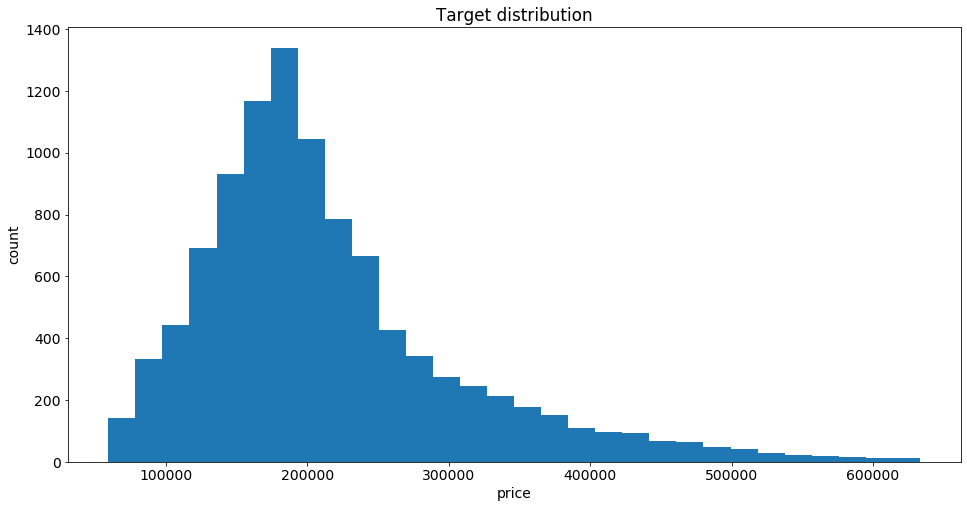

In [13]:
plt.figure(figsize = (16, 8))
plt.hist(df.Price, bins=30)
plt.ylabel('count')
plt.xlabel('price')
plt.title('Target distribution')
plt.show()

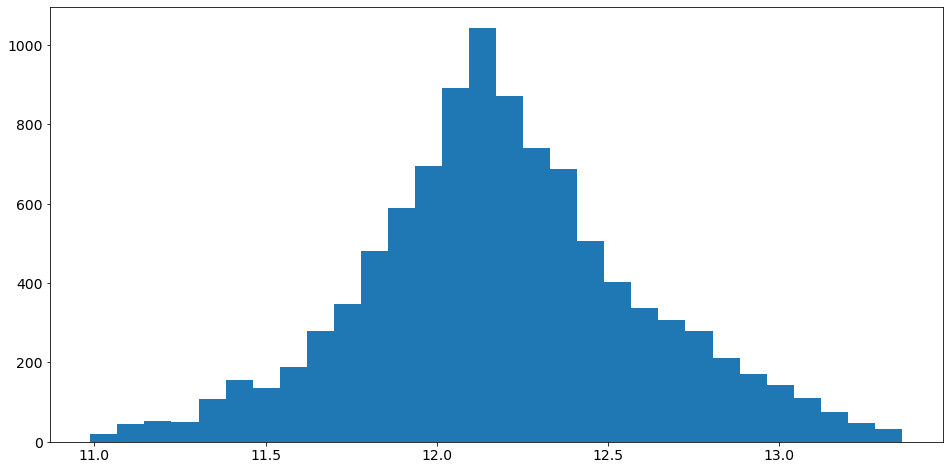

In [14]:
plt.figure(figsize = (16, 8))
z = np.log(df.Price)
plt.hist(z, bins=30)
plt.show()

**Rooms - количество комнат**

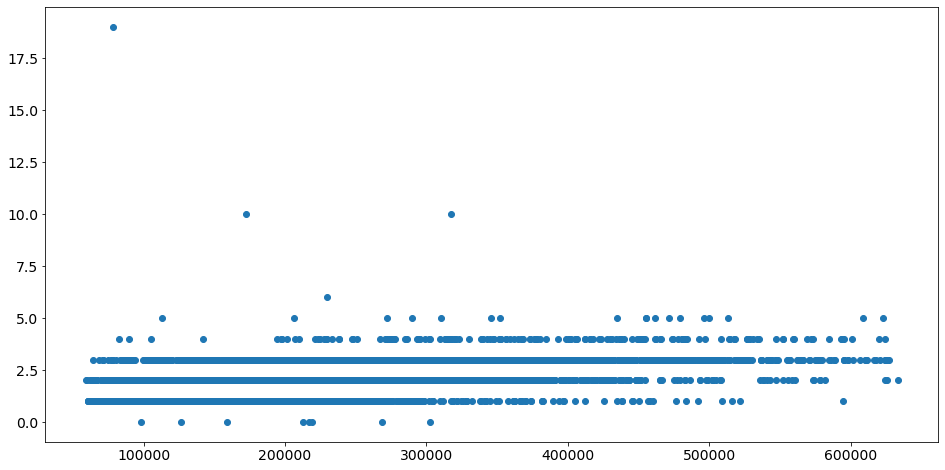

In [15]:
plt.figure(figsize = (16, 8))
plt.scatter(df.Price, df.Rooms)

In [16]:
df[df['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.00000,59.05698,36.22307,10.00000,22,22.00000,2002,0.09080,B,B,74,19083,2,nan,5,15,B,317265.32379
1454,8491,1,19.00000,42.00605,21.77929,7.00000,17,17.00000,2014,0.00712,B,B,1,264,0,nan,0,1,B,78364.61670
8849,14865,9,10.00000,60.87127,38.42068,10.00000,3,2.00000,1994,0.16153,B,B,25,5648,1,30.00000,2,4,B,172329.27086


In [17]:
rooms_median = df['Rooms'].median()
df.loc[df['Rooms'] > 6, 'Rooms'] = rooms_median

**Square - площадь**

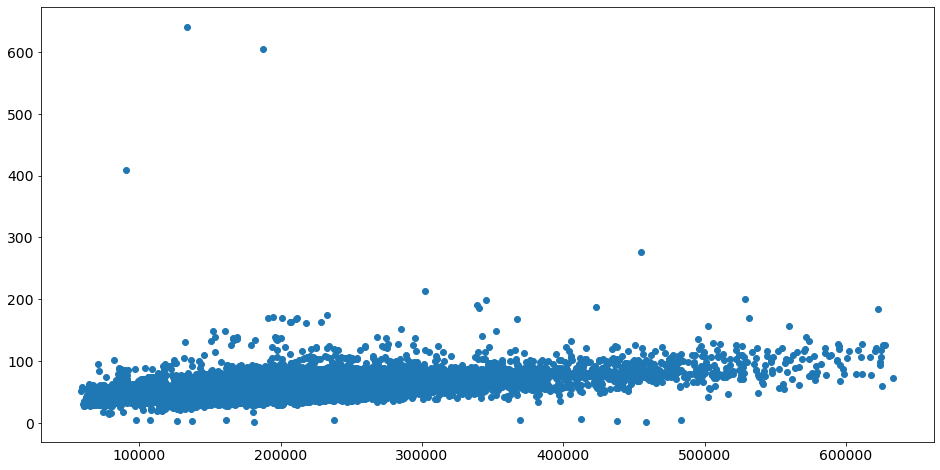

In [18]:
plt.figure(figsize = (16, 8))
plt.scatter(df.Price, df.Square)

In [19]:
df[df['Square'] > 250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.00000,275.64528,233.94931,26.00000,12,37.00000,2011,0.16198,B,A,31,7010,5,4508.00000,3,7,B,455264.88267
4262,28,9,2.00000,604.70597,nan,1.00000,17,18.00000,1977,0.16153,B,B,25,5648,1,30.00000,2,4,B,187717.24254
4690,2307,102,1.00000,409.42518,410.63975,10.00000,4,4.00000,2016,0.23862,B,B,26,3889,6,705.00000,3,6,B,90470.43083
6977,11602,30,2.00000,641.06519,638.16319,10.00000,20,19.00000,2019,0.00008,B,B,22,6398,141,1046.00000,3,23,B,133529.68156


In [20]:
square_median = df['Square'].median()
df.loc[df['Square'] > 300, 'Square'] = square_median

**LifeSquare - жилая площадь**

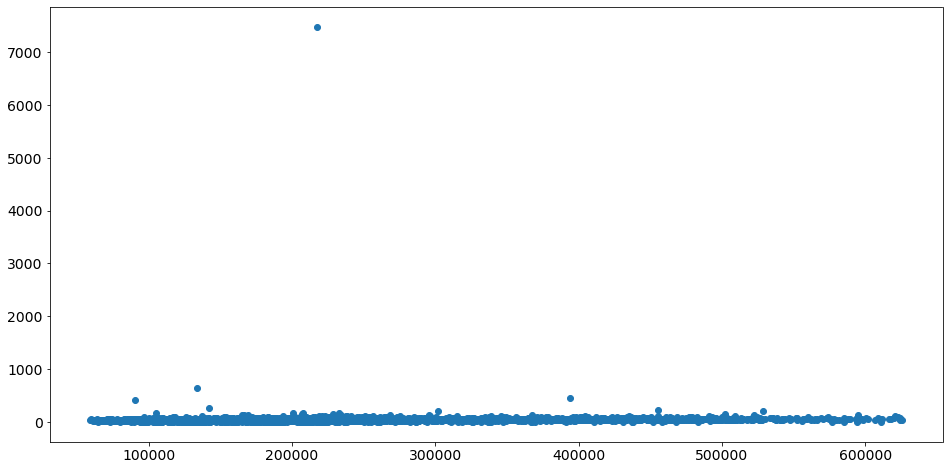

In [21]:
plt.figure(figsize = (16, 8))
plt.scatter(df.Price, df.LifeSquare)

In [22]:
lifesquare_median = df['LifeSquare'].median()
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = lifesquare_median
df.loc[df['LifeSquare'] > 300, 'LifeSquare'] = lifesquare_median

**KitchenSquare - площадь кухни**

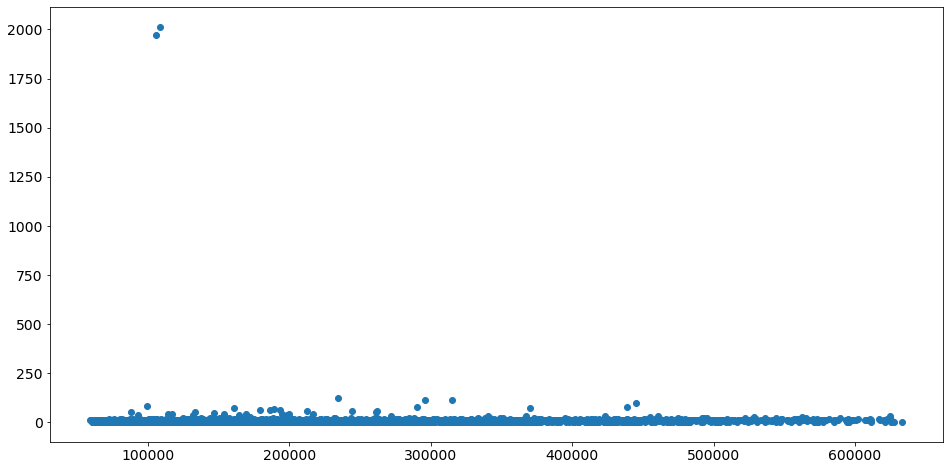

In [23]:
plt.figure(figsize = (16, 8))
plt.scatter(df.Price, df.KitchenSquare)

In [24]:
kitchensquare_median = df['KitchenSquare'].median()
df.loc[df['KitchenSquare'] > 300, 'KitchenSquare'] = kitchensquare_median

**HouseYear - год постройки дома**

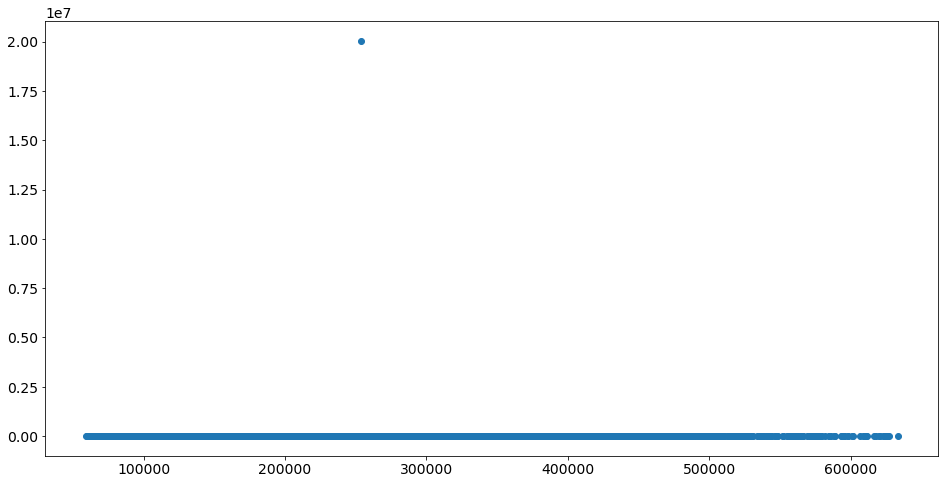

In [25]:
plt.figure(figsize = (16, 8))
plt.scatter(df.Price, df.HouseYear)

In [26]:
df[df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.00000,37.26507,20.23971,9.00000,9,12.00000,20052011,0.13633,B,B,30,6141,10,262.00000,3,6,B,254084.53440
4189,11607,147,2.00000,44.79184,28.36039,5.00000,4,9.00000,4968,0.31981,B,B,25,4756,16,2857.00000,5,8,B,243028.60310


In [27]:
df.loc[df['Id'] == '10814', 'HouseYear'] = 2011
df.loc[df['Id'] == '11607', 'HouseYear'] = 1968

**Healthcare_1 - показатели местности, связанные с охраной здоровья**

In [28]:
healthcare_1_median = df['Healthcare_1'].median()
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = healthcare_1_median

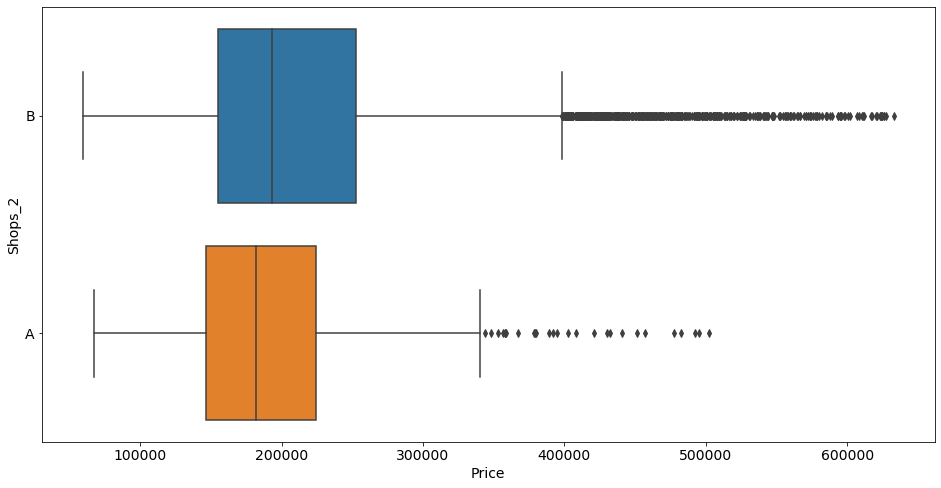

In [29]:
plt.figure(figsize=(16, 8))
sns.boxplot(df.Price, df.Shops_2)

**Построение новых признаков**

In [30]:
df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 0
df.loc[df['Ecology_2'] == 'B', 'Ecology_2'] = 1
df.loc[df['Ecology_3'] == 'A', 'Ecology_3'] = 0
df.loc[df['Ecology_3'] == 'B', 'Ecology_3'] = 1
df.loc[df['Shops_2'] == 'A', 'Shops_2'] = 0
df.loc[df['Shops_2'] == 'B', 'Shops_2'] = 1

In [31]:
df_num_features = df.select_dtypes(include=['float64', 'int64']).drop('Price', axis=1)

In [32]:
df[df['Square'] < df['KitchenSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
5149,13703,42,1.00000,38.07169,19.72355,73.00000,9,10.00000,2006,0.15825,1,1,21,5731,0,900.00000,1,0,1,160488.03316
7088,6569,27,1.00000,38.22026,18.71686,84.00000,4,17.00000,2018,0.01165,1,1,4,915,0,900.00000,0,0,1,99079.96052


In [33]:
df = df.loc[df['Square'] >= df['KitchenSquare']]

In [34]:
df.loc[df['Square'] < 15, 'Square'] = square_median

In [35]:
df[df['Square'] < df['LifeSquare']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.00000,42.53004,43.96776,1.00000,3,9.00000,2014,0.03466,1,1,0,168,0,900.00000,0,0,1,95338.19855
44,10521,38,3.00000,104.21140,106.34040,0.00000,20,0.00000,2017,0.06075,1,1,15,2787,2,520.00000,0,7,1,435462.04807
52,2301,1,2.00000,61.40005,65.22460,0.00000,17,22.00000,2016,0.00712,1,1,1,264,0,900.00000,0,1,1,199215.45223
123,8753,25,3.00000,85.95231,89.80375,1.00000,4,3.00000,2017,0.06975,1,1,53,13670,4,900.00000,1,11,1,309688.59268
153,9870,62,1.00000,51.83147,53.49130,1.00000,5,1.00000,2015,0.07216,1,1,2,629,1,900.00000,0,0,0,131797.47228


**Моделирование**

In [47]:
features_names = df.select_dtypes(include=['float64', 'int64']).drop('Price', axis=1).columns.tolist()
target_name = 'Price'
X = df[features_names]
y = df[target_name]

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, shuffle=True, random_state=72) - best result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, shuffle=True, random_state=62)

In [49]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 4)) + "\n",
        "MAE:\t" + str(round(mae(true_values, pred_values), 4)) + "\n",
        "MSE:\t" + str(round(mse(true_values, pred_values), 4)))

In [50]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [51]:
X_train_scaled.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000,8298.00000
mean,-0.11220,0.15445,0.16693,-0.01708,0.18943,-0.04670,0.28994,0.24325,-0.00571,0.01852,1.21232,0.69950,0.16353,0.25122
std,0.81614,0.79726,1.02461,0.64181,0.65361,0.85636,0.68262,0.66747,0.58558,0.70386,4.79363,4.17028,0.74912,0.96241
min,-2.00000,-1.50182,-2.06110,-0.75000,-0.75000,-1.62500,-2.48148,-0.42341,-0.83333,-0.89411,-0.40000,-5.00000,-0.50000,-0.60000
25%,-1.00000,-0.44568,-0.45103,-0.62500,-0.37500,-0.50000,-0.11111,-0.32434,-0.63333,-0.65018,-0.40000,-0.50000,-0.50000,-0.40000
50%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.00000,0.55432,0.54897,0.37500,0.62500,0.50000,0.88889,0.67566,0.36667,0.34982,0.60000,0.50000,0.50000,0.60000
max,3.00000,9.30926,14.67484,14.62500,4.37500,13.00000,1.59259,2.50622,1.63333,2.41097,27.80000,21.93889,2.50000,4.00000


**Алгоритм - "Случайный лес"**

In [52]:
features_names = df.drop(['Price', 'Id','LifeSquare'], axis=1).columns.tolist()

In [53]:
X = df[features_names]

In [54]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, shuffle=True, random_state=72) - best result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, shuffle=True, random_state=62)

In [55]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=22, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.9615
 MAE:	10858.0048
 MSE:	332367337.0201


In [57]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

R2:	0.764
 MAE:	26425.0237
 MSE:	2028690751.0032


In [58]:
md = np.arange(14, 25, 1)
ne = [200, 250, 300, 350, 400, 450, 500]
model_inf = []

In [59]:
for i in ne:
    for j in md:
        rf_model = RandomForestRegressor(n_estimators=i, max_depth=j, n_jobs=-1)
        rf_model.fit(X_train, y_train)
        y_test_preds = rf_model.predict(X_test)
        print(f'est = {i}, depth = {j}')
        evaluate_preds(y_test, y_test_preds)

est = 200, depth = 14
R2:	0.7614
 MAE:	26629.0592
 MSE:	2050469518.0605
est = 200, depth = 15
R2:	0.7632
 MAE:	26514.9135
 MSE:	2035472124.9907
est = 200, depth = 16
R2:	0.7624
 MAE:	26515.897
 MSE:	2042340612.8825
est = 200, depth = 17
R2:	0.7624
 MAE:	26432.7169
 MSE:	2041809790.0725
est = 200, depth = 18
R2:	0.7606
 MAE:	26600.3392
 MSE:	2057656234.4347
est = 200, depth = 19
R2:	0.7622
 MAE:	26555.0037
 MSE:	2043589344.3348
est = 200, depth = 20
R2:	0.7631
 MAE:	26414.6745
 MSE:	2035857728.0568
est = 200, depth = 21
R2:	0.7603
 MAE:	26507.8912
 MSE:	2060187813.0821
est = 200, depth = 22
R2:	0.7615
 MAE:	26587.0206
 MSE:	2050130307.3472
est = 200, depth = 23
R2:	0.7628
 MAE:	26425.0186
 MSE:	2039057826.5303
est = 200, depth = 24
R2:	0.7604
 MAE:	26535.537
 MSE:	2059163197.189
est = 250, depth = 14
R2:	0.7618
 MAE:	26610.02
 MSE:	2046974312.4153
est = 250, depth = 15
R2:	0.7613
 MAE:	26504.7324
 MSE:	2051930256.5483
est = 250, depth = 16
R2:	0.7615
 MAE:	26533.415
 MSE:	2050150125.489

In [60]:
rf_model = RandomForestRegressor(n_estimators=350, max_depth=22, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=350, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.39976
11,Social_2,0.09578
10,Social_1,0.09421
1,Rooms,0.07621
12,Social_3,0.05618
0,DistrictId,0.04655
7,Ecology_1,0.04373
6,HouseYear,0.04361
4,Floor,0.03462
3,KitchenSquare,0.02858


**Дообучение модели**

In [62]:
rf_model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=350, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Прогнозирование**

In [63]:
dft = pd.read_csv(TEST_DATASET_PATH)

In [64]:
dft['Id'] = dft['Id'].astype('str')
dft['DistrictId'] = dft['DistrictId'].astype('str')

In [65]:
dft.loc[dft['Id'] == '10814', 'HouseYear'] = 2011
dft.loc[dft['Id'] == '11607', 'HouseYear'] = 1968

In [66]:
dft.loc[dft['Ecology_2'] == 'A', 'Ecology_2'] = 0
dft.loc[dft['Ecology_2'] == 'B', 'Ecology_2'] = 1
dft.loc[dft['Ecology_3'] == 'A', 'Ecology_3'] = 0
dft.loc[dft['Ecology_3'] == 'B', 'Ecology_3'] = 1
dft.loc[dft['Shops_2'] == 'A', 'Shops_2'] = 0
dft.loc[dft['Shops_2'] == 'B', 'Shops_2'] = 1

In [67]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [68]:
dft.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.00000,5000.00000,3959.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,2623.00000,5000.00000,5000.00000
mean,1.91000,56.44950,36.15881,5.97680,8.63200,12.60100,1984.39260,0.11987,24.93380,5406.90000,8.26260,1146.65726,1.31940,4.24280
std,0.83859,19.09279,17.82529,9.95002,5.48323,6.78921,18.57315,0.12007,17.53220,4026.61477,23.86376,1044.74423,1.47994,4.77736
min,0.00000,1.37854,0.33349,0.00000,1.00000,0.00000,1908.00000,0.00000,0.00000,168.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,41.90623,23.09203,1.00000,4.00000,9.00000,1973.00000,0.01951,6.00000,1564.00000,0.00000,325.00000,0.00000,1.00000
50%,2.00000,52.92134,32.92509,6.00000,7.00000,12.00000,1977.00000,0.07216,25.00000,5285.00000,2.00000,900.00000,1.00000,3.00000
75%,2.00000,66.28513,45.17409,9.00000,12.00000,17.00000,2000.00000,0.19578,36.00000,7287.00000,5.00000,1548.00000,2.00000,6.00000
max,17.00000,223.45369,303.07109,620.00000,78.00000,99.00000,2020.00000,0.52187,74.00000,19083.00000,141.00000,4849.00000,6.00000,23.00000


In [69]:
dft[dft['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.00000,52.86611,32.52834,8.00000,15,17.00000,1987,0.09344,1,1,23,4635,5,3300.00000,2,4,1


In [70]:
dft.loc[dft['Rooms'] > 6, 'Rooms'] = rooms_median

In [71]:
dft[dft['Square'] > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [72]:
dft.loc[dft['LifeSquare'].isnull(), 'LifeSquare'] = lifesquare_median
dft.loc[dft['LifeSquare'] > 300, 'LifeSquare'] = lifesquare_median

In [73]:
dft.loc[dft['KitchenSquare'] > 300, 'KitchenSquare'] = kitchensquare_median

In [74]:
dft.loc[dft['Healthcare_1'].isnull(), 'Healthcare_1'] = healthcare_1_median

In [75]:
X = dft[features_names]
y = rf_model.predict(X)

**Сохраняем результаты**

In [76]:
Res = pd.DataFrame(dft['Id'])
Res['Price'] = y

In [77]:
Res.to_csv(RES_PATH, index=False, encoding='utf-8')

In [78]:
# from google.colab import files
# files.download('./result_submission.csv')